In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

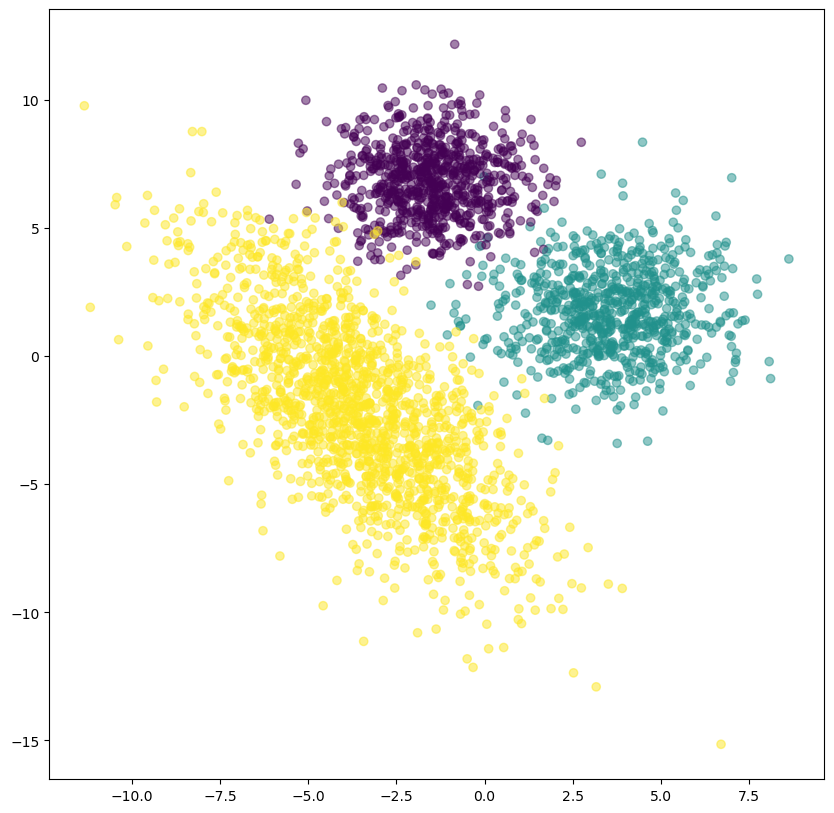

In [4]:
import numpy as np
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)         #make_blobs() көмегімен екі түрлі кластер жасалды.
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])# үшінші кластер қосылды
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)             #np.dot() арқылы деректер трансформацияланды
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))# екі массивті біріктіру


plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()


In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))#zip() арқылы бірегей мәндер мен олардың санын жұптастырады
{0: 750, 1: 750, 2: 1500}


{0: 750, 1: 750, 2: 1500}

In [6]:
# Задания 7.5.1
init_random = 'random'


In [8]:
# Задание 7.5.2
from sklearn.cluster import KMeans
import numpy as np

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

# Центроид координаталарын екі ондық таңбаға дейін дөңгелектейді
centroids = np.round(k_means.cluster_centers_, 2)
print(centroids)


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-3.19 -2.9 ]
 [-2.38  6.23]
 [ 3.63  1.74]]


In [9]:
# Задания 7.5.3
_, cluster_counts = np.unique(k_means.labels_, return_counts=True)#Бізге тек объект саны керек болғандықтан, бірінші мәнді _ арқылы өткізіп жібереміз
print(cluster_counts)


[1320  938  742]


In [50]:
# Задания 7.5.4
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Загрузка данных
snsdata = pd.read_csv('snsdata.csv')

# Оставляем только колонки с интересами
interest_columns = snsdata.columns[4:]

# Извлекаем данные по интересам
X_interests = snsdata[interest_columns]

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_interests)

# Обучаем модель K-means
kmeans = KMeans(n_clusters=9, random_state=123)
snsdata['cluster'] = kmeans.fit_predict(X_scaled)

# 1. Указываем номер кластера, в который попало меньше всего учеников
cluster_counts = snsdata['cluster'].value_counts()
least_populated_cluster = cluster_counts.idxmin()

# 2. Сколько учеников попали в кластер с интересами: music, god, dance, hair, shopping, cute, band, rock, football, church
# Модифицируем маску, чтобы она проверяла наличие хотя бы одного из интересов
target_interests = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']
mask = (snsdata[target_interests] == 1).any(axis=1)  # Проверяем, что хотя бы один интерес присутствует

# Проверим, сколько учеников попали в этот кластер
students_in_target_cluster = snsdata[mask].shape[0]

# Если есть такие ученики, получим их кластер
if students_in_target_cluster > 0:
    target_cluster = snsdata[mask]['cluster'].iloc[0]
else:
    target_cluster = None

# Выводим результаты
least_populated_cluster, students_in_target_cluster, target_cluster


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(5, 22028, 4)

In [11]:
# Задания 7.6.1

em_param = "n_components"


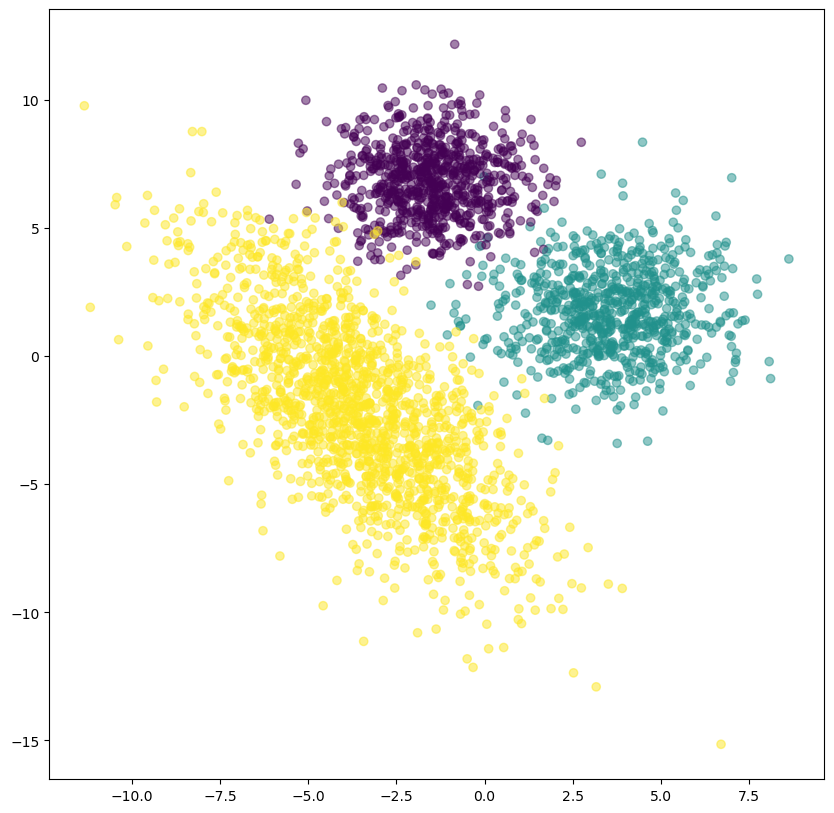

[[ 4.  2.]
 [-2.  7.]
 [-4. -2.]]


In [12]:
# Задания 7.6.2

from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# Визуализация данных
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()


gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

# Округление до целых чисел
gm_means = np.round(gm.means_, decimals=0)
print(gm_means)


In [13]:
# Задания 7.6.3

y_pred_gm = gm.predict(X)
_, gm_cluster_counts = np.unique(y_pred_gm, return_counts=True)
print(*gm_cluster_counts)


744 763 1493


In [14]:
# Задание 7.6.4

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Загрузка данных
snsdata = pd.read_csv('snsdata.csv')

# Оставляем только колонки с интересами
interest_columns = snsdata.columns[4:]

# Извлекаем данные по интересам
X_interests = snsdata[interest_columns]

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_interests)

# Обучаем модель GaussianMixture с 9 кластерами
gm = GaussianMixture(n_components=9, random_state=123)
gm.fit(X_scaled)

# Получаем кластер для восьмого ученика (индекс 7, так как индексация с нуля)
eighth_student_cluster = gm.predict([X_scaled[7]])[0]

# Количество итераций до схождения
iterations_to_converge = gm.n_iter_

# Выводим результаты
print(f"Восьмой ученик попал в кластер: {eighth_student_cluster}")
print(f"Количество итераций до схождения: {iterations_to_converge}")


Восьмой ученик попал в кластер: 3
Количество итераций до схождения: 23


In [15]:
# Задания 7.7.1

linkage_average = "average"  

from sklearn.cluster import AgglomerativeClustering  

# Агломеративті кластерлеу әдісін қолдану
ac = AgglomerativeClustering(n_clusters=3)  
ac.fit(X)  

# Деректерді біріктіру кезінде пайда болған жапырақтар саны
n_leaves = ac.n_leaves_  
print(n_leaves)  



3000


In [16]:
# Задания 7.7.2

_, ac_cluster_counts = np.unique(ac.labels_, return_counts=True)
print(*ac_cluster_counts)


1112 1142 746


In [17]:
# Задание 7.7.3
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# kneighbors_graph көмегімен байланыс матрицасын жасау
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)  # Матрицаны симметриялау

# Агломеративті кластерлеу моделін үйрету, n_clusters=3 параметрімен
ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac.fit(X)

# Әр кластердегі элементтер саны
cluster_counts = pd.Series(ac.labels_).value_counts().sort_index()
print(" ".join(map(str, cluster_counts)))


1486 746 768


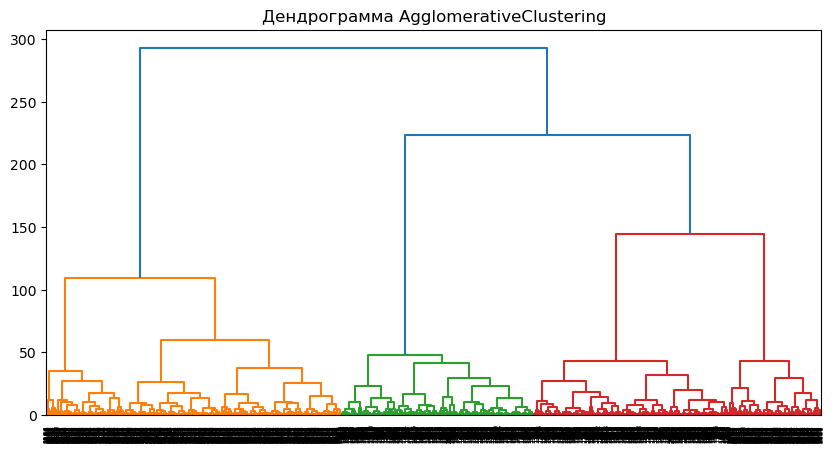

3 5


In [18]:
# Задание 7.7.4 - 7.7.5
# Дендрограмма
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Ward әдісін қолданып, байланыс матрицасын құру
Z = linkage(X, method="ward")

# Кластерлердің санын анықтау
n_clusters_150 = len(np.unique(fcluster(Z, 150, criterion="distance")))
n_clusters_100 = len(np.unique(fcluster(Z, 100, criterion="distance")))

# Дендрограмманың визуализациясы
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90.)
plt.title("Дендрограмма AgglomerativeClustering")
plt.show()

# Кластерлер санын шығару
print(n_clusters_150, n_clusters_100)


(cluster
 4    14
 2     7
 1     2
 3     2
 5     1
 6     1
 Name: count, dtype: int64,
 3,
 2)

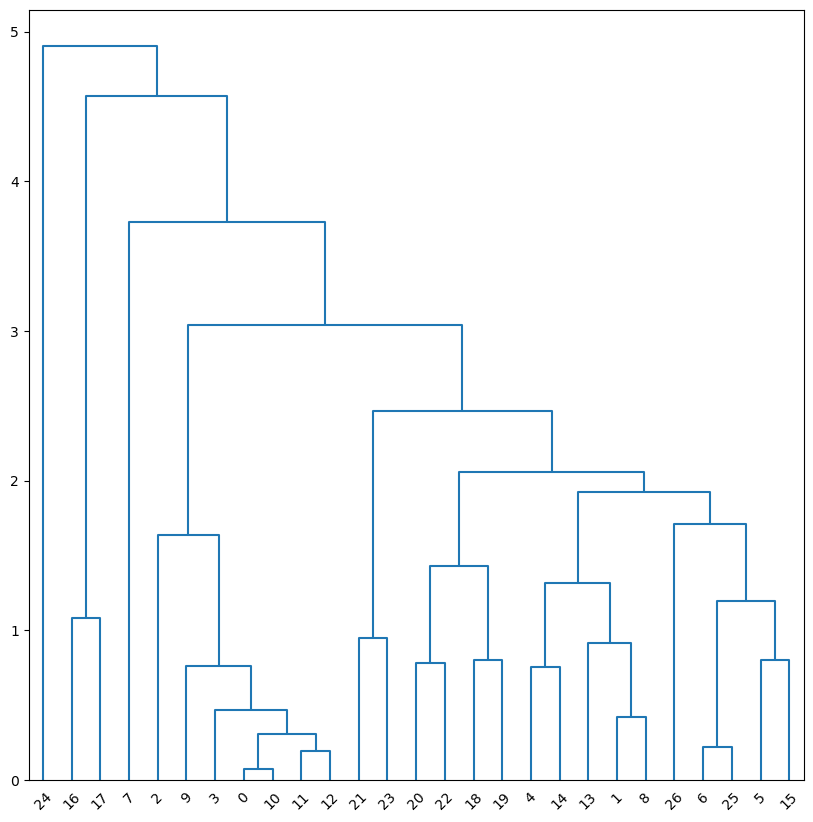

In [40]:
#Задание 7.7.6 
import pandas as pd

# Деректерді оқу
food_data = pd.read_csv('food.txt', sep=" ", header=0)

# Деректердің алғашқы 5 қатарын көрсету
food_data.head()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# Кластерлеу үшін тек сандық деректерді алу
X = food_data[['Energy', 'Protein', 'Fat', 'Calcium', 'Iron']]

# Деректерді стандарттау (нормализациялау)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархиялық кластерлеу әдісін қолдану
Z = linkage(X_scaled, method='average', metric='euclidean')

# Дендрограмманы құрып, кластерлеудің нәтижесін визуализациялау
from scipy.cluster.hierarchy import dendrogram
dendrogram(Z, color_threshold=0)

# Белгілі бір қашықтық шегіне (t = 2.3) сәйкес кластерлерді жасау
t = 2.3
labels = fcluster(Z, t, criterion='distance')

# Деректерге кластерлердің меткасын қосу
food_data['cluster'] = labels

# Әр кластерде қанша элемент бар екенін санау
cluster_counts = food_data['cluster'].value_counts()

# Кальций мөлшері 150 мен 160 аралығында болатын өнімдерді табу
calcium_mask = (food_data['Calcium'] >= 150) & (food_data['Calcium'] <= 160)
calcium_cluster = food_data[calcium_mask]['cluster'].values[0]

# Ең жоғары май мөлшері бар өнімді табу
max_fat_product = food_data.loc[food_data['Fat'].idxmax()]

# Нәтижелерді шығару
cluster_counts, calcium_cluster, max_fat_product['cluster']


In [20]:
# Задание 7.8.1
dbscan_min_samples_param = "min_samples"


In [41]:
# Задание 7.8.2

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Деректер жиынтығын жасау
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])

# Мәліметтерге трансформация қолдану
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)

# Деректерді біріктіру
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# DBSCAN кластерлеу алгоритмін қолдану min_samples — кластерді қалыптастыру үшін қажет минималды нүктелер саны
dbscan = DBSCAN(eps=0.9, min_samples=35)#eps — екі нүктенің арасындағы максималды қашықтық
dbscan.fit(X)

# Кластерлердің санын санау (қоқыстарды есепке алмағанда)
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(n_clusters_dbscan)


3


In [22]:
# Задание 7.8.3
n_outliers_dbscan = np.sum(dbscan.labels_ == -1)
print(n_outliers_dbscan)


368


In [23]:
# Задание 7.8.4

dbscan_08 = DBSCAN(eps=0.8, min_samples=35)
dbscan_08.fit(X)

# Подсчет количества выбросов
n_outliers_dbscan_08 = np.sum(dbscan_08.labels_ == -1)
print(n_outliers_dbscan_08)


583


In [42]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Модельдерді анықтау
kmeans = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=35)

# Моделдерді үйрету
kmeans.fit(X)
gm.fit(X)
ac.fit(X)
dbscan.fit(X)

# Силуэт коэффициентін есептеу
silhouette_scores = {
    "K-means": silhouette_score(X, kmeans.labels_),
    "EM (GaussianMixture)": silhouette_score(X, gm.predict(X)),
    "AgglomerativeClustering": silhouette_score(X, ac.labels_),
    "DBSCAN": silhouette_score(X, dbscan.labels_)
}
# Барлық силуэт коэффициенттерін шығару
for model, score in silhouette_scores.items():
    print(f"{model}: {score}")
# Ең үлкен силуэт коэффициенті
max_silhouette = max(silhouette_scores.values())
print(max_silhouette)



C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: 0.5131209788437305
EM (GaussianMixture): 0.49893287606943293
AgglomerativeClustering: 0.4811992210663849
DBSCAN: 0.4454335539277996
0.5131209788437305


In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Задание 7.11.1: Обучаем GaussianMixture с n_components=3 и считаем коэффициент силуэта
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_scaled)
gm_labels = gm.predict(X_scaled)
silhouette_gm = silhouette_score(X_scaled, gm_labels)
print(f"Silhouette for GaussianMixture: {silhouette_gm}")

Silhouette for GaussianMixture: 0.5022144530587643


In [43]:
# Задание 7.11.2:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Нормализация деректерін жасау
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# EM-алгоритм (GaussianMixture)
gm = GaussianMixture(n_components=3, random_state=42)
gm_labels = gm.fit_predict(X_scaled)
silhouette_gm = silhouette_score(X, gm_labels)

# Агломеративная кластеризация
ac = AgglomerativeClustering(n_clusters=3)
ac_labels = ac.fit_predict(X)
silhouette_ac = silhouette_score(X, ac_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan_labels = dbscan.fit_predict(X)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # DBSCAN может дать -1 для выбросов

# Выводим все коэффициенты силуэта для всех моделей
print(f"K-means Silhouette Score: {silhouette_kmeans}")
print(f"EM (GaussianMixture) Silhouette Score: {silhouette_gm}")
print(f"AgglomerativeClustering Silhouette Score: {silhouette_ac}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

# Максимальное значение коэффициента силуэта
max_silhouette = max(silhouette_kmeans, silhouette_gm, silhouette_ac, silhouette_dbscan)
print(f"Max Silhouette Score: {max_silhouette}")


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.5130125124601936
EM (GaussianMixture) Silhouette Score: 0.49893287606943293
AgglomerativeClustering Silhouette Score: 0.4811992210663849
DBSCAN Silhouette Score: 0.4492309392411127
Max Silhouette Score: 0.5130125124601936


In [27]:
# Задание 7.11.3: Подбираем оптимальное количество кластеров

# Для K-means и EM-алгоритма
best_silhouette_kmeans = -1
best_kmeans_clusters = 2
best_silhouette_gm = -1
best_gm_clusters = 2
best_silhouette_ac = -1
best_ac_clusters = 2

for n_clusters in range(2, 11):
    # K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
    if silhouette_kmeans > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_kmeans
        best_kmeans_clusters = n_clusters
    
    # GaussianMixture
    gm = GaussianMixture(n_components=n_clusters, random_state=42)
    gm_labels = gm.fit_predict(X_scaled)
    silhouette_gm = silhouette_score(X_scaled, gm_labels)
    if silhouette_gm > best_silhouette_gm:
        best_silhouette_gm = silhouette_gm
        best_gm_clusters = n_clusters
    
    # Агломеративная кластеризация
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    ac_labels = ac.fit_predict(X_scaled)
    silhouette_ac = silhouette_score(X_scaled, ac_labels)
    if silhouette_ac > best_silhouette_ac:
        best_silhouette_ac = silhouette_ac
        best_ac_clusters = n_clusters

# Выводим оптимальное количество кластеров для каждого алгоритма
print(f"Best number of clusters for K-means: {best_kmeans_clusters}")
print(f"Best number of clusters for EM (GaussianMixture): {best_gm_clusters}")
print(f"Best number of clusters for AgglomerativeClustering: {best_ac_clusters}")


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\clust

Best number of clusters for K-means: 3
Best number of clusters for EM (GaussianMixture): 4
Best number of clusters for AgglomerativeClustering: 3


In [55]:
# Задание 7.12.1
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение моделей и расчет коэффициента однородности для каждого алгоритма

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
homogeneity_kmeans = homogeneity_score(y, kmeans_labels)

# GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42)
gm_labels = gm.fit_predict(X_scaled)
homogeneity_gm = homogeneity_score(y, gm_labels)

# AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
ac_labels = ac.fit_predict(X_scaled)
homogeneity_ac = homogeneity_score(y, ac_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=35)
dbscan_labels = dbscan.fit_predict(X_scaled)
homogeneity_dbscan = homogeneity_score(y, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # DBSCAN может вернуть -1 для выбросов

# Выводим коэффициенты однородности для всех алгоритмов
print(f"K-means Homogeneity Score: {round(homogeneity_kmeans, 2)}")
print(f"EM (GaussianMixture) Homogeneity Score: {round(homogeneity_gm, 2)}")
print(f"AgglomerativeClustering Homogeneity Score: {round(homogeneity_ac, 2)}")
print(f"DBSCAN Homogeneity Score: {round(homogeneity_dbscan, 2)}")

# Выводим максимальный коэффициент однородности
max_homogeneity = max(homogeneity_kmeans, homogeneity_gm, homogeneity_ac, homogeneity_dbscan)
print(f"Max Homogeneity Score: {round(max_homogeneity, 2)}")



C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Homogeneity Score: 0.8
EM (GaussianMixture) Homogeneity Score: 0.93
AgglomerativeClustering Homogeneity Score: 0.91
DBSCAN Homogeneity Score: 0.08
Max Homogeneity Score: 0.93


In [29]:
from sklearn.metrics.cluster import completeness_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Задание 7.13.1: Обучаем GaussianMixture с n_components=3 и считаем полноту
gm = GaussianMixture(n_components=3, random_state=42)
gm_labels = gm.fit_predict(X_scaled)
completeness_gm = completeness_score(y, gm_labels)
print(f"Completeness for GaussianMixture: {round(completeness_gm, 2)}")

# Задание 7.13.2: Сравниваем полноту для 4 алгоритмов

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
completeness_kmeans = completeness_score(y, kmeans_labels)

# Агломеративная кластеризация
ac = AgglomerativeClustering(n_clusters=3)
ac_labels = ac.fit_predict(X_scaled)
completeness_ac = completeness_score(y, ac_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan_labels = dbscan.fit_predict(X_scaled)
completeness_dbscan = completeness_score(y, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # DBSCAN может вернуть -1 для выбросов

# Выводим максимальную полноту
max_completeness = max(completeness_kmeans, completeness_gm, completeness_ac, completeness_dbscan)
print(f"Max Completeness Score: {round(max_completeness, 2)}")


Completeness for GaussianMixture: 0.93


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max Completeness Score: 0.93


In [30]:
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import kneighbors_graph
import numpy as np

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7.14.1: Обучаем GaussianMixture с n_components=3 и считаем v-меру
gm = GaussianMixture(n_components=3, random_state=42)
gm_labels = gm.fit_predict(X_scaled)
v_measure_gm = v_measure_score(y, gm_labels)
print(f"V-measure for GaussianMixture: {round(v_measure_gm, 2)}")


V-measure for GaussianMixture: 0.93


In [31]:
# 7.14.2: Сравниваем K-means, GaussianMixture, AgglomerativeClustering и DBSCAN

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
v_measure_kmeans = v_measure_score(y, kmeans_labels)

# AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
ac_labels = ac.fit_predict(X_scaled)
v_measure_ac = v_measure_score(y, ac_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan_labels = dbscan.fit_predict(X_scaled)
v_measure_dbscan = v_measure_score(y, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # DBSCAN может вернуть -1 для выбросов

# Выводим максимальное значение v-меры
max_v_measure = max(v_measure_kmeans, v_measure_gm, v_measure_ac, v_measure_dbscan)
print(f"Max V-measure Score: {round(max_v_measure, 2)}")

C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Max V-measure Score: 0.93


In [32]:
# 7.14.3: Сравниваем модификации K-means с использованием случайной инициализации и алгоритма k-means++
kmeans_plus = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(X_scaled)
v_measure_kmeans_plus = v_measure_score(y, kmeans_plus_labels)

kmeans_random = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans_random_labels = kmeans_random.fit_predict(X_scaled)
v_measure_kmeans_random = v_measure_score(y, kmeans_random_labels)

# Выводим максимальное значение v-меры для обеих модификаций K-means
max_v_measure_kmeans = max(v_measure_kmeans_plus, v_measure_kmeans_random)
print(f"Max V-measure for K-means (k-means++ vs random): {round(max_v_measure_kmeans, 2)}")

Max V-measure for K-means (k-means++ vs random): 0.79


In [33]:
# 7.14.4: Сравниваем K-means и MiniBatchKMeans
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch_labels = kmeans_mini_batch.fit_predict(X_scaled)
v_measure_kmeans_mini_batch = v_measure_score(y, kmeans_mini_batch_labels)

# Выводим максимальное значение v-меры для K-means и MiniBatchKMeans
max_v_measure_kmeans_mini_batch = max(v_measure_kmeans, v_measure_kmeans_mini_batch)
print(f"Max V-measure for K-means vs MiniBatchKMeans: {round(max_v_measure_kmeans_mini_batch, 2)}")

C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Max V-measure for K-means vs MiniBatchKMeans: 0.79


In [34]:

# 7.14.5: Сравниваем разные типы расстояний в AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

# Агломеративті кластеризация үшін байланыс түрлерін анықтаймыз
linkage_types = ['ward', 'complete', 'average', 'single']

# Ең жақсы v-мера мәнін сақтау үшін бастапқы мәндерді орнатамыз
best_v_measure_ac = -1
best_linkage = None

# Әрбір байланыс түрі үшін агломеративті кластеризацияны орындаймыз
for linkage_type in linkage_types:
    # Агломеративті кластеризация моделін жасаймыз
    ac = AgglomerativeClustering(n_clusters=3, linkage=linkage_type)
    ac_labels = ac.fit_predict(X_scaled)  # Кластерлеуді орындаймыз
    
    # Әр кластерлеудің нәтижесі үшін v-мераны есептейміз
    v_measure_ac_current = v_measure_score(y, ac_labels)
    
    # Егер ағымдағы v-мера бұрынғыдан жоғары болса, оны сақтаймыз
    if v_measure_ac_current > best_v_measure_ac:
        best_v_measure_ac = v_measure_ac_current
        best_linkage = linkage_type

# Ең жақсы байланыс түрін және оның v-мера мәнін шығарамыз
print(f"Best linkage type for AgglomerativeClustering: {best_linkage}, V-measure: {round(best_v_measure_ac, 2)}")


Best linkage type for AgglomerativeClustering: ward, V-measure: 0.91


In [47]:
# 7.14.6: Сравниваем кластеризацию без и с матрицей смежности
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score
from sklearn.neighbors import kneighbors_graph

# Матрица смежности (connectivity) жасау
connectivity = kneighbors_graph(X_scaled, n_neighbors=6, include_self=False)  # 6 көршінің графын жасаймыз
connectivity = 0.5 * (connectivity + connectivity.T)  # Симметризация жасау (графтың бағытын жоямыз)

# 1. Агломеративті кластеризация (connectivity қолданбай)
ac_no_connectivity = AgglomerativeClustering(n_clusters=3)  # Кластерлеуді 3 кластерге бөлу
ac_no_connectivity_labels = ac_no_connectivity.fit_predict(X_scaled)  # Кластерлеу нәтижесін алу
v_measure_ac_no_connectivity = v_measure_score(y, ac_no_connectivity_labels)  # v-мера коэффициентін есептеу

# 2. Агломеративті кластеризация (connectivity қолдана отырып)
ac_with_connectivity = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)  # Матрица смежности қолданып кластерлеу
ac_with_connectivity_labels = ac_with_connectivity.fit_predict(X_scaled)  # Кластерлеу нәтижесін алу
v_measure_ac_with_connectivity = v_measure_score(y, ac_with_connectivity_labels)  # v-мера коэффициентін есептеу

# Ең жақсы v-мера мәнін шығарамыз
max_v_measure_ac = max(v_measure_ac_no_connectivity, v_measure_ac_with_connectivity)  # Ең үлкен v-мера мәнін табамыз
print(f"Max V-measure for AgglomerativeClustering (with vs without connectivity): {round(max_v_measure_ac, 2)}")


Max V-measure for AgglomerativeClustering (with vs without connectivity): 0.91


In [36]:
# 7.14.7: Сравниваем DBSCAN с разными параметрами eps
dbscan_09 = DBSCAN(eps=0.9, min_samples=35)
dbscan_09_labels = dbscan_09.fit_predict(X)
v_measure_dbscan_09 = v_measure_score(y, dbscan_09_labels) if len(set(dbscan_09_labels)) > 1 else -1

dbscan_08 = DBSCAN(eps=0.8, min_samples=35)
dbscan_08_labels = dbscan_08.fit_predict(X)
v_measure_dbscan_08 = v_measure_score(y, dbscan_08_labels) if len(set(dbscan_08_labels)) > 1 else -1

# Выводим максимальное значение v-меры для двух версий DBSCAN
max_v_measure_dbscan = max(v_measure_dbscan_09, v_measure_dbscan_08)
print(f"Max V-measure for DBSCAN (eps=0.9 vs eps=0.8): {round(max_v_measure_dbscan, 2)}")

Max V-measure for DBSCAN (eps=0.9 vs eps=0.8): 0.77


In [37]:
# 7.14.8: Считаем v-меру для DBSCAN без выбросов
dbscan_no_outliers = DBSCAN(eps=0.9, min_samples=35)
dbscan_no_outliers_labels = dbscan_no_outliers.fit_predict(X)

# Вычисляем v-меру без учета выбросов (исключая метку -1)
mask = dbscan_no_outliers_labels != -1
v_measure_dbscan_no_outliers = v_measure_score(y[mask], dbscan_no_outliers_labels[mask])
print(f"V-measure for DBSCAN without outliers: {round(v_measure_dbscan_no_outliers, 2)}")

V-measure for DBSCAN without outliers: 0.97


In [38]:
# 7.14.9: Сравниваем влияние нормализации на агломеративную кластеризацию
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

ac_min_max = AgglomerativeClustering(n_clusters=3)
ac_min_max_labels = ac_min_max.fit_predict(X_min_max_scaled)
v_measure_ac_min_max = v_measure_score(y, ac_min_max_labels)

# Без нормализации
ac_no_min_max = AgglomerativeClustering(n_clusters=3)
ac_no_min_max_labels = ac_no_min_max.fit_predict(X_scaled)
v_measure_ac_no_min_max = v_measure_score(y, ac_no_min_max_labels)

# Выводим максимальное значение v-меры для двух версий
max_v_measure_ac_norm = max(v_measure_ac_min_max, v_measure_ac_no_min_max)
print(f"Max V-measure for AgglomerativeClustering with MinMax vs without MinMax normalization: {round(max_v_measure_ac_norm, 2)}")

Max V-measure for AgglomerativeClustering with MinMax vs without MinMax normalization: 0.91


In [39]:
# 7.14.10: Сравниваем влияние MinMax нормализации на v-меру
ac_min_max = AgglomerativeClustering(n_clusters=3)
ac_min_max_labels = ac_min_max.fit_predict(X_min_max_scaled)
v_measure_ac_min_max = v_measure_score(y, ac_min_max_labels)

# Выводим v-меру для MinMax нормализации
print(f"V-measure for AgglomerativeClustering with MinMax normalization: {round(v_measure_ac_min_max, 2)}")

V-measure for AgglomerativeClustering with MinMax normalization: 0.89
